In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from datetime import datetime
import platform
import collections

In [73]:
recentRoot = "/datasets/sagarj/vine2016/Dataset/"
Meta = "Meta/"
tracked = "/postTracking/Day53/"

In [96]:
medianPopReposts = 2173.0
meanPopReposts = 16064.0

medianPopLikes = 7544.0
meanPopLikes = 42521.0

medianPopLoops = 318566.0
meanPopLoops = 2405671.0

In [91]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

def getCrawled(root , postDir):
    crawledDir = root + postDir
    crawledPosts = os.listdir(crawledDir)
    print len(crawledPosts)
    posts = []
    postDict = {}
    for post in crawledPosts:
        postid = post.split('.')[0]
        record = readJson(crawledDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
            postDict[postid] = p['records'][0]
    print len(postDict.keys())
    return postDict

def getChannelMetas(channelNumber):
    MetaDir = recentRoot + Meta
    MetaEntries = os.listdir(MetaDir)
    posts = {}
    for entry in MetaEntries:
        if entry.split('_')[1].split('.')[0].strip() == str(channelNumber):
            creationTime = datetime.fromtimestamp(os.path.getctime(MetaDir + entry)).strftime("%Y-%m-%d %H:%M:%S")
            record = readJson(MetaDir + entry)
            p = record['data']
            if isinstance(p,dict):
                posts[creationTime] = p
    od = collections.OrderedDict(sorted(posts.items()))
    return od

def findUniq(od ):
    uniquePosts = []
    crawledPosts = []
    totalPosts = []
    for k, v in od.items():
        records = v['records']
        if isinstance(records,list):
            u = 0
            for i in range (0 , len(records)):
                subRecord = records[i]
                postid = subRecord['postId']
                if postid in totalPosts:
                    break
                else:
                    totalPosts.append(postid)
                    u+=1
            uniquePosts.append(u)
            crawledPosts.append(len(records))
    return uniquePosts, crawledPosts

def channelPostDict(MetaDir , trackedPosts):
    channelPost = {}
    MetaEntries = os.listdir(MetaDir)
    for entry in MetaEntries:
        channelNumber = entry.split('_')[1].split('.')[0].strip()
        #print entry
        record = readJson(MetaDir + entry)
        p = record['data']
        if isinstance(p,dict):
            records = p['records']
            if isinstance(records,list):        
                for rec in records:
                    ID = str(rec['postId'])
                    if ID in trackedPosts.keys():
                        channelPost[ID] = {}
                        channelPost[ID]['Channel'] = channelNumber 
                        channelPost[ID]['Loops'] = trackedPosts[ID]['loops']['count']
                        channelPost[ID]['Likes'] = trackedPosts[ID]['likes']['count']
                        channelPost[ID]['Reposts'] = trackedPosts[ID]['reposts']['count']
    return channelPost



In [77]:
trackedDict = getCrawled(recentRoot , tracked )

106396
74948


In [88]:
print trackedDict[trackedDict.keys()[1]]

{u'liked': 0, u'videoDashUrl': u'http://v.cdn.vine.co/r/videos_dashhd/9AEA7C8E3E1384687956081672192_5cfb7b90854.33.0.2373774F-E34E-4C7B-AA36-0543485F4950.mp4?versionId=1YbMJCY4OxuBGTPuG3dEwZxb1g79UhmZ', u'foursquareVenueId': u'', u'userId': 1378568208465981440, u'private': 0, u'videoWebmUrl': None, u'loops': {u'count': 71.0, u'velocity': 0.0, u'onFire': 0}, u'thumbnailUrl': u'http://v.cdn.vine.co/r/thumbs/9AEA7C8E3E1384687956081672192_5cfb7b90854.33.0.2373774F-E34E-4C7B-AA36-0543485F4950.mp4.jpg?versionId=x0cSmP9sBShqJ8eNXkd7ql.4UkBXtAW4', u'explicitContent': 0, u'vanityUrls': [], u'verified': 0, u'avatarUrl': u'http://v.cdn.vine.co/r/avatars/76A62150B41388989253144510464_57000a23818.35.1.jpg?versionId=QsVHx_cQKOJJ7hJrvl2.hPSHfnGqw0M7', u'comments': {u'count': 0, u'anchorStr': u'', u'records': [], u'previousPage': None, u'backAnchor': u'', u'anchor': None, u'nextPage': None, u'size': 0}, u'entities': [{u'type': u'tag', u'range': [0, 21], u'link': u'vine://tag/chocolatechipwaffles', u'i

In [ ]:
channelPost = channelPostDict(recentRoot + Meta , trackedDict)

In [95]:
print len(channelPost.keys())

74948


In [99]:
popCount = np.zeros(19)
for k in channelPost.keys():
    if channelPost[k]['Loops'] > medianPopLoops or channelPost[k]['Likes'] > medianPopLikes or channelPost[k]['Reposts'] > medianPopReposts:
        popCount[int(channelPost[k]['Channel'])] += 1
    

In [100]:
channelCount = np.zeros(19)
for k in channelPost.keys():
    channelCount[int(channelPost[k]['Channel'])] += 1

In [103]:
channelCount = channelCount + 1

In [104]:
print popCount , channelCount

[   0.   66.   22.    0.    0.   13.    0.    8.    0.  329.    8.    8.
    7.    0.   68.    9.    0.   57.    0.] [  1.00000000e+00   1.25590000e+04   6.78800000e+03   1.00000000e+00
   2.00000000e+00   5.50000000e+03   1.00000000e+00   5.30000000e+01
   1.00000000e+00   1.18710000e+04   4.47000000e+03   1.44340000e+04
   1.11000000e+02   1.00000000e+00   4.01700000e+03   1.28000000e+02
   4.80000000e+01   1.49800000e+04   1.00000000e+00]


In [114]:
percentPopular = (popCount/channelCount)*100
print percentPopular

[  0.           0.52551955   0.32410136   0.           0.           0.23636364
   0.          15.09433962   0.           2.77145986   0.17897092
   0.05542469   6.30630631   0.           1.69280558   7.03125      0.
   0.38050734   0.        ]


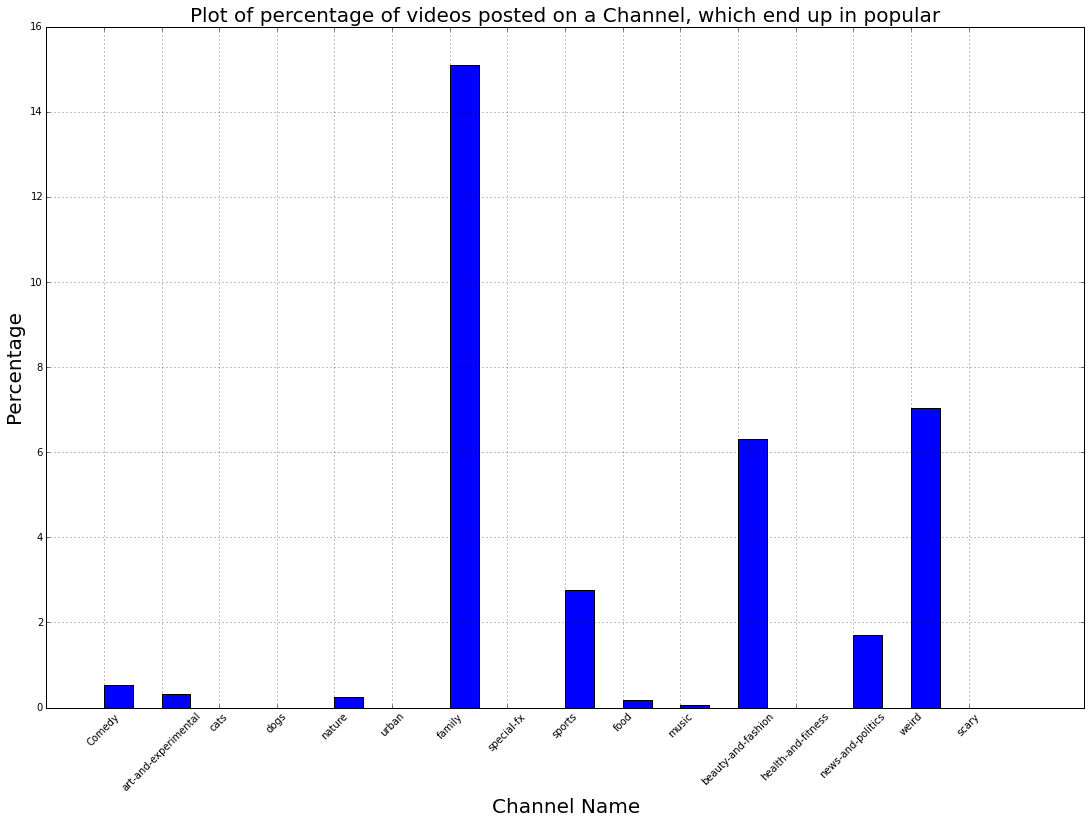

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

width = 0.50    

ind = np.arange(1 , len(percentPopular) - 2)

rects1 = ax.bar(ind , percentPopular[1:17] , width, color='b')
#rects2 = ax.bar(ind , channelCount[1:17] , width, color='r')

plt.tight_layout()

ax.set_xticks(ind)
ax.set_xticklabels(('Comedy', 'art-and-experimental', 'cats', 'dogs', 'nature' , 'urban', 'family' ,'special-fx' ,
                    'sports', 'food', 'music', 'beauty-and-fashion', 'health-and-fitness', 'news-and-politics',
                    'weird', 'scary', 'animals') , rotation=45)

plt.title("Plot of percentage of videos posted on a Channel, which end up in popular", fontsize = 20)
plt.xlabel("Channel Name",fontsize = 20)
plt.ylabel("Percentage",fontsize = 20)
plt.grid()
plt.show()

In [44]:
crawledChannels = []
uniqueChannels = []

for i in range(1,16):
    print "Working with channel %d" %i
    Channel = getChannelMetas(i)
    unique , crawled = findUniq(Channel)
    crawledChannels.append(crawled)
    uniqueChannels.append(unique)

Working with channel 1
Working with channel 2
Working with channel 3
Working with channel 4
Working with channel 5
Working with channel 6
Working with channel 7
Working with channel 8
Working with channel 9
Working with channel 10
Working with channel 11
Working with channel 12
Working with channel 13
Working with channel 14
Working with channel 15


In [58]:
ComedyPercentage = [float(uniqueChannels[0][i])/float(crawledChannels[0][i]) for i in range(len(crawledChannels[0]))]

In [59]:
ComedyPercentage

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [55]:
totalCrawled = list(crawledChannels[0])
totalDownloaded = list(uniqueChannels[0])
for i in range(1,15):
    c = crawledChannels[i]
    d = uniqueChannels[i]
    for i in range(len(c)):
        totalCrawled[i] = totalCrawled[i] + c[i]
    for i in range(len(d)):
        totalDownloaded[i] = totalDownloaded[i] + d[i]
        
fraction = []
for i in range(len(totalDownloaded)):
    fraction.append(float(totalDownloaded[i])/float(totalCrawled[i]))
    
    

In [70]:
print totalCrawled

[1155, 1152, 1162, 1160, 1063, 1106, 1074, 1091, 1117, 1130, 1125, 1089, 1130, 1122, 1129, 1142, 1147, 1147, 1145, 1157, 1153, 1153, 1147, 1156, 1154, 1156, 1153, 1156, 1155, 1146, 1147, 1155, 1154, 1158, 1150, 1147, 1156, 1098, 1066, 1085, 1092, 1116, 1122, 1116, 1124, 1132, 1135, 1158, 1156, 1162, 1156, 1163, 1153, 1151, 1146, 1144, 1155, 1143, 1138, 1146, 1151, 1147, 1145, 1144, 1145, 1134, 1141, 1147, 1147, 1144, 1147, 1151, 1151, 1151, 1147, 1150, 1149, 1151, 1154, 1156, 1150, 1150, 1155, 1154, 1154, 1147, 1151, 1148, 1145, 1145, 1149, 1149, 1147, 1152, 1155, 1155, 1152, 1153, 1149, 1150, 1151, 1152, 1152, 1153, 1155, 1151, 1150, 1153, 1151, 1142, 1149, 1149, 1152, 1151, 1150, 1155, 1156, 1157, 1154, 1155, 1151, 1155, 1154, 1157, 1165, 1168, 1165, 1168, 1167, 1165, 1166, 1166, 1165, 1160, 1161, 1169, 901, 1023, 1162, 1165, 1142, 1157, 1168, 1168, 1166, 1164, 1172, 1171, 1170, 1167, 1164, 1168, 1159, 1164, 1167, 1166, 1158, 1164, 1164, 1166, 1162, 1167, 1164, 1165, 1163, 1164, 1164

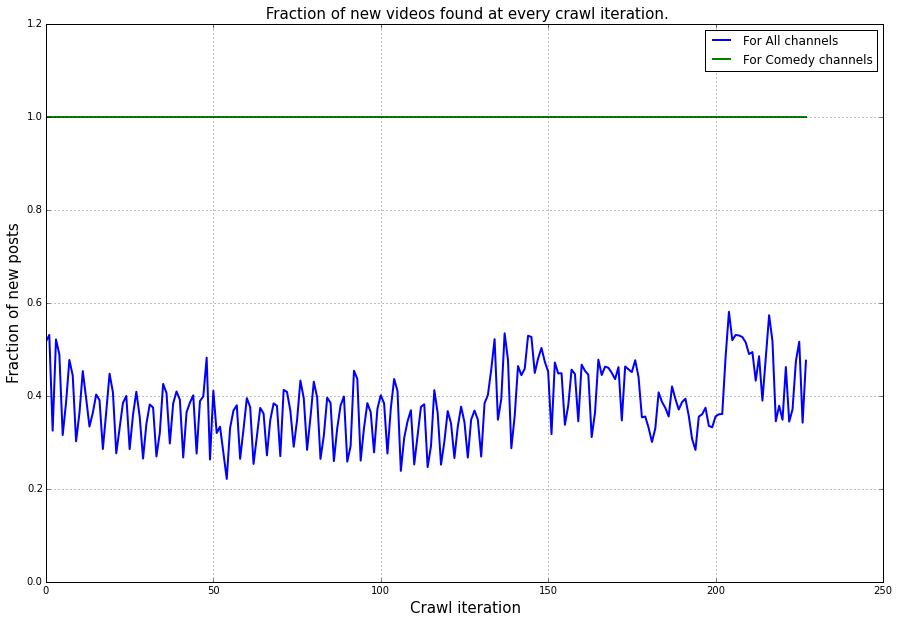

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title(" Fraction of new videos found at every crawl iteration. ", fontsize = 15)
plt.xlabel("Crawl iteration",fontsize = 15)
plt.ylabel("Fraction of new posts",fontsize = 15)

plt.plot(fraction[1:-1],linewidth = 2)
plt.plot(ComedyPercentage[1:-1],linewidth = 2)

plt.grid(True)
plt.legend(['For All channels', 'For Comedy channels'   
           ])
ax.set_ylim(0,1.2)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title("Comparison of Total recent posts found Vs Unique posts Downloaded ", fontsize = 15)
plt.xlabel("Iteration Cycle",fontsize = 15)
plt.ylabel("Number of posts",fontsize = 15)

plt.plot(fraction,linewidth = 1.5)
# plt.plot(totalDownloaded,linewidth = 1.5)

plt.grid(True)
plt.legend(['Posts Found', 'Unique Posts Downloaded'   
           ])
plt.show()